In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install nltk
# !pip install plotly
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
#!pip install pyarrow


In [ ]:
import numpy as np
import pandas as pd
import nltk
#from sklearn.feature_extraction import stop_words
from nltk.text import Text
from collections import Counter
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pandas import DataFrame
from plotly import graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# WORKDIR = 'C:/Users/thewr/git/sentiment_analysis_twitter_netflix/'
WORKDIR = '/home/cesar/BD/sentiment_analysis_twitter_netflix'

netflix_tweets_DIR =  WORKDIR + '/Data/Processed/'
netflix_tweets_proc_file =  WORKDIR + '/Data/Processed/netflix_all_tweets.parquet'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 300)
from nltk.stem import RSLPStemmer







In [ ]:
# import csv 
# import os

# os.getcwd()

# os.listdir('/home/cesar/BD/sentiment_analysis_twitter_netflix/Data/Processed/')

# os.listdir(netflix_tweets_DIR)

# os.path.isfile(netflix_tweets_proc_file)

# if not os.path.exists(WORKDIR):
#    os.makedirs(WORKDIR)

# pd.io.parquet.PyArrowImpl()

# Data reading 

In [3]:
df_netflix_all_tweets = pd.read_parquet(netflix_tweets_proc_file)

print('shape:', df_netflix_all_tweets.shape)
print('columns:', df_netflix_all_tweets.columns)

shape: (22210, 11)
columns: Index(['reaction_to_status_id', 'reaction_to_status_text',
       'reaction_to_status_created_at', 'id', 'text_x', 'created_at', 'url',
       'text_cleaned', 'in_reply_to_status_id_str', 'quoted_status_id_str',
       'sentimento'],
      dtype='object')


In [4]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0


In [55]:
df_netflix_all_tweets.describe()

,id,url,sentimento,sentiment_sentilex,sentiment_leia_number,sentiment_leia_number_to_compare_metrics
count,2.221000e+04,0.0,22210.000000,22210.000000,22210.000000,22210.000000
mean,1.359803e+18,NaN,1.114588,0.193381,-0.003079,0.574471
std,3.008412e+15,NaN,0.955853,0.516748,0.292429,0.787508
min,1.356229e+18,NaN,0.000000,0.000000,-0.987700,0.000000
25%,1.356244e+18,NaN,0.000000,0.000000,0.000000,0.000000
50%,1.360922e+18,NaN,2.000000,0.000000,0.000000,0.000000
75%,1.362174e+18,NaN,2.000000,0.000000,0.000000,1.000000
max,1.366209e+18,NaN,2.000000,2.000000,0.950100,2.000000


In [5]:
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /home/cesar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/cesar/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [6]:
final_stopwords_list = nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('portuguese')

In [7]:
newStopWords = ['pra', 'diaz','juliette','lumena','carla','bbb21','gilberto','victor', 'hugo', 'globo', 'rodolfo', 'thais...','thaís','thais', 'caio', 'arcrebiano', 'brother',
               'lucas', 'bbb2021', 'paredão', 'probosta','projota','lider','líder', 'karol', 'conka', 'pocah', 'penteado', 'rodolffo','camilla','sarah','nego',
               'fiuk','fiukk','fiu','arthur','viih','boninho','big','pocahh','bbb']
final_stopwords_list.extend(newStopWords)

In [8]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0


# Models evaluation

## Sentilex

In [9]:
#Importing Sentilex lexicon with polarity words
sentilexpt = open('SentiLex-lem-PT02.txt')

#Creating dictionary with polarity words
dic_polarity_word = {}
for i in sentilexpt.readlines():
  pos_point = i.find('.')
  word = (i[:pos_point])
  pol_pos = i.find('POL')
  polarity = (i[pol_pos+7:pol_pos+9]).replace(';', '')
  dic_polarity_word[word] = polarity

#print (dic_polarity_word)

In [10]:
def sentiment_value_prediction(text):
    text = text.lower()
    l_sentiment = []    

    for p in text.split():    
        l_sentiment.append(int(dic_polarity_word.get(p, 0)))
    
    value = sum(l_sentiment)                    
    
    
    if value > 0:
        return 2.0
    elif value == 0:
        return 0.0
    elif value < 0:
        return 1.0


df_netflix_all_tweets['sentiment_sentilex']= df_netflix_all_tweets['text_x'].apply(lambda x:sentiment_value_prediction(x))

In [11]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento,sentiment_sentilex
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0,0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0,0.0


Text(0.5, 1.0, 'Sentiment Distribution - Sentilex Lexicon')

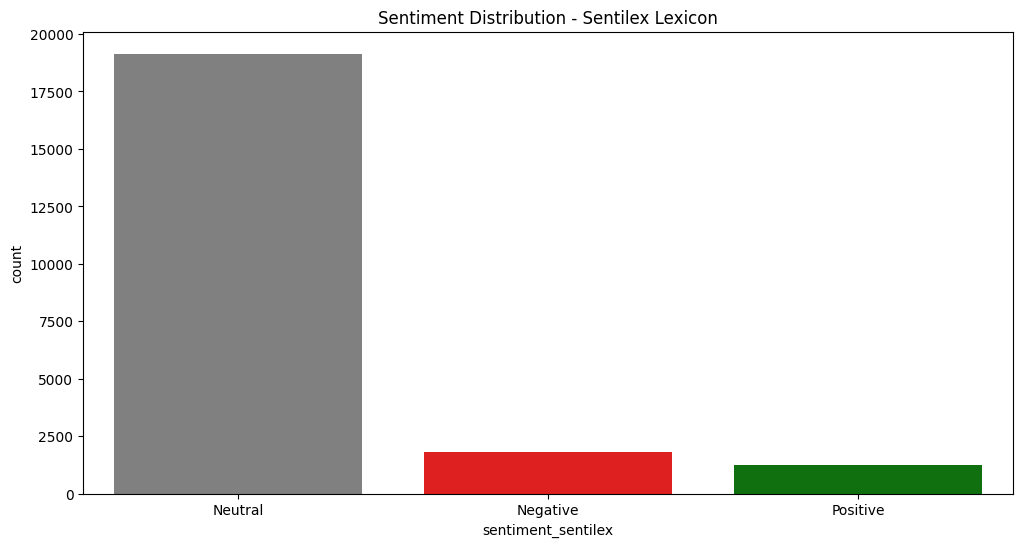

In [12]:
#sentiment distribution according to Sentilex
plt.figure(figsize=(12,6))
ax = sns.countplot(x='sentiment_sentilex',palette=['gray','red','green'], data=df_netflix_all_tweets)
ax.set_xticklabels(['Neutral','Negative','Positive'], rotation='horizontal', fontsize=10)
ax.set_title('Sentiment Distribution - Sentilex Lexicon')

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(df_netflix_all_tweets['sentimento'], df_netflix_all_tweets['sentiment_sentilex'])

0.41517334533993694

In [14]:
print(metrics.classification_report(df_netflix_all_tweets['sentimento'], df_netflix_all_tweets['sentiment_sentilex']))

              precision    recall  f1-score   support

         0.0       0.41      0.88      0.56      9019
         1.0       0.28      0.31      0.29      1627
         2.0       0.63      0.07      0.12     11564

    accuracy                           0.42     22210
   macro avg       0.44      0.42      0.33     22210
weighted avg       0.51      0.42      0.31     22210



In [15]:
print (pd.crosstab(df_netflix_all_tweets['sentimento'], df_netflix_all_tweets['sentiment_sentilex'], rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0.0   1.0   2.0    All
Real                             
0.0       7943   706   370   9019
1.0       1028   507    92   1627
2.0      10177   616   771  11564
All      19148  1829  1233  22210


## Leia

In [16]:
#LeIA is a fork from tool and lexicon VADER (Valence Aware Dictionary and sEntiment Reasoner) adapted to portuguese texts
#https://github.com/rafjaa/LeIA
import leia
from leia import SentimentIntensityAnalyzer

def sentiment_prediction_leia(text):
    
    s = SentimentIntensityAnalyzer()
    
    polarity = s.polarity_scores(text)
    return polarity
   

df_netflix_all_tweets['sentiment_leia_compound']= df_netflix_all_tweets['text_cleaned'].apply(lambda x:sentiment_prediction_leia(x))

In [17]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento,sentiment_sentilex,sentiment_leia_compound
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [18]:
#extractig only de compound value from 'sentiment_leia_compound' column
df_netflix_all_tweets['sentiment_leia_number'] = df_netflix_all_tweets['sentiment_leia_compound'].apply(pd.Series)['compound']

In [19]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento,sentiment_sentilex,sentiment_leia_compound,sentiment_leia_number
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


In [20]:
#adapting leIa sentiment number to compare with 'sentimento' column
df_netflix_all_tweets['sentiment_leia_number_to_compare_metrics'] = df_netflix_all_tweets['sentiment_leia_number'].apply(lambda x: 2.0 if x > 0 else 1.0 if x < 0 else 0.0)

In [21]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento,sentiment_sentilex,sentiment_leia_compound,sentiment_leia_number,sentiment_leia_number_to_compare_metrics
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,0.0


In [22]:
#removing columns of no use
df_netflix_all_tweets.drop(('sentiment_leia_compound'),axis=1, inplace=True)

In [23]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento,sentiment_sentilex,sentiment_leia_number,sentiment_leia_number_to_compare_metrics
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0,0.0,0.0,0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Sentiment Distribution - Leia Lexicon')

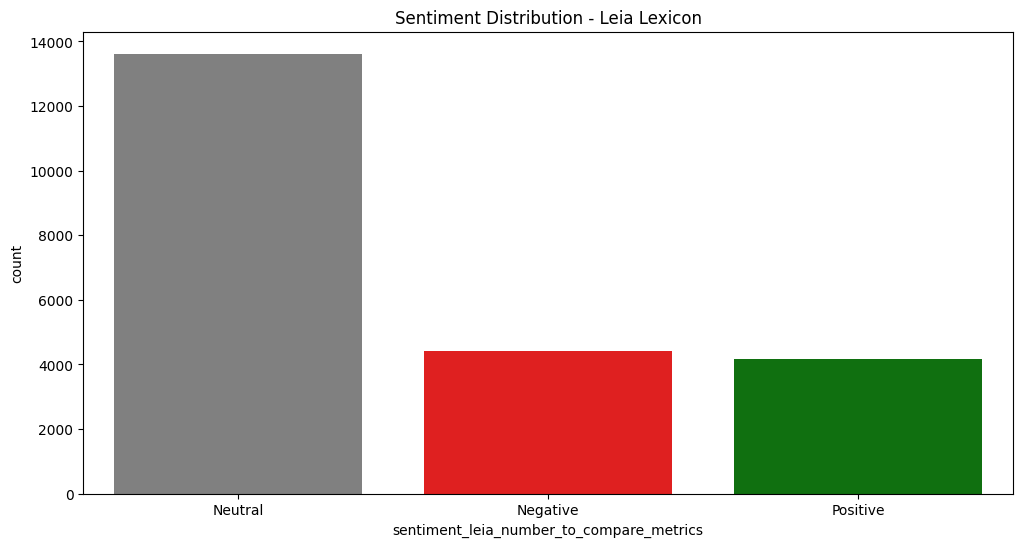

In [24]:
#sentiment distribution according to LeIa
plt.figure(figsize=(12,6))
ax = sns.countplot(x='sentiment_leia_number_to_compare_metrics',palette=['gray','red','green'],data=df_netflix_all_tweets)
ax.set_xticklabels(['Neutral','Negative','Positive'], rotation='horizontal', fontsize=10)
ax.set_title('Sentiment Distribution - Leia Lexicon')

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(df_netflix_all_tweets['sentimento'], df_netflix_all_tweets['sentiment_leia_number_to_compare_metrics'])

0.4115263394867177

In [26]:
print(metrics.classification_report(df_netflix_all_tweets['sentimento'], df_netflix_all_tweets['sentiment_leia_number_to_compare_metrics']))

              precision    recall  f1-score   support

         0.0       0.42      0.64      0.51      9019
         1.0       0.20      0.53      0.29      1627
         2.0       0.60      0.22      0.32     11564

    accuracy                           0.41     22210
   macro avg       0.41      0.46      0.37     22210
weighted avg       0.50      0.41      0.39     22210



In [27]:
print (pd.crosstab(df_netflix_all_tweets['sentimento'], df_netflix_all_tweets['sentiment_leia_number_to_compare_metrics'], rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0.0   1.0   2.0    All
Real                             
0.0       5777  1798  1444   9019
1.0        526   868   233   1627
2.0       7320  1749  2495  11564
All      13623  4415  4172  22210


In [28]:
#Preparing data to apply other classification algorithms
stemmer_ptbr = RSLPStemmer()
def stemming_tokenizer(raw_text):     
    words = raw_text.split() 
    words = [word for word in words if word not in final_stopwords_list]
    words = [stemmer_ptbr.stem(word) for word in words]
    return words  

In [29]:
df_netflix_all_tweets.head(2)

,reaction_to_status_id,reaction_to_status_text,reaction_to_status_created_at,id,text_x,created_at,url,text_cleaned,in_reply_to_status_id_str,quoted_status_id_str,sentimento,sentiment_sentilex,sentiment_leia_number,sentiment_leia_number_to_compare_metrics
0,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229083223515136,@NetflixBrasil oie https://t.co/33L2geGxWD,Mon Feb 01 13:13:05 +0000 2021,NaN,mencao_arroba oie,1356229042647789569,None,0.0,0.0,0.0,0.0
1,1356229042647789569,"Em fevereiro não posso, tô com a agenda cheia. 👇🏾 https://t.co/IBI89vqg5H",Mon Feb 01 13:12:55 +0000 2021,1356229130489126920,@NetflixBrasil Já ia falar que vcs estavam atrasados 😂,Mon Feb 01 13:13:16 +0000 2021,NaN,mencao_arroba ja ia falar que vcs estavam atrasados rosto_chorando_de_rir,1356229042647789569,None,2.0,0.0,0.0,0.0


In [30]:
y = df_netflix_all_tweets['sentimento']

In [31]:
vectorizer_tfidf = TfidfVectorizer(tokenizer=stemming_tokenizer, min_df=0.001, max_df=0.99)
X = vectorizer_tfidf.fit_transform(df_netflix_all_tweets['text_cleaned'])
X.shape

/home/cesar/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(22210, 634)

In [32]:
vocab = np.array(vectorizer_tfidf.get_feature_names())

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [34]:
#splitting dataframe into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

## Randon Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                       n_jobs=-1, oob_score=True)

In [36]:
predicted = m.predict(X_test)

In [37]:
predicted

array([2., 2., 1., ..., 2., 0., 2.])

In [ ]:
# importances = m.feature_importances_
# sem_importancia = []
# for i,w in enumerate(importances):
#   if w == 0:
#     sem_importancia.append(vocab[i])
#     print(vocab[i],w)

In [ ]:
# importances = m.feature_importances_
# c_importancia = []
# for i,w in enumerate(importances):
#   if w > 0:
#     c_importancia.append(vocab[i])
#     print(vocab[i],w)

In [ ]:
#len(c_importancia)

In [ ]:
#len(sem_importancia)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.7924965893587994

In [39]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78      2995
         1.0       0.78      0.42      0.55       555
         2.0       0.89      0.78      0.83      3780

    accuracy                           0.79      7330
   macro avg       0.79      0.69      0.72      7330
weighted avg       0.81      0.79      0.79      7330



In [ ]:
print (pd.crosstab(y_test, predicted, rownames=['Real'], colnames=['Predito'], margins=True))

## SVM

In [40]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)

In [41]:
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 

In [42]:
print(accuracy)

0.8004092769440655


In [43]:
print(metrics.classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.92      0.79      2995
         1.0       0.82      0.38      0.52       555
         2.0       0.92      0.77      0.84      3780

    accuracy                           0.80      7330
   macro avg       0.82      0.69      0.72      7330
weighted avg       0.82      0.80      0.80      7330



In [44]:
print (pd.crosstab(y_test, svm_predictions, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0.0  1.0   2.0   All
Real                          
0.0      2741   31   223  2995
1.0       314  210    31   555
2.0       850   14  2916  3780
All      3905  255  3170  7330


## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy)

0.7092769440654844


In [46]:
print(metrics.classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67      2995
         1.0       0.78      0.24      0.37       555
         2.0       0.72      0.82      0.77      3780

    accuracy                           0.71      7330
   macro avg       0.73      0.57      0.60      7330
weighted avg       0.71      0.71      0.70      7330



In [47]:
print (pd.crosstab(y_test, knn_predictions, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0.0  1.0   2.0   All
Real                          
0.0      1975   27   993  2995
1.0       220  134   201   555
2.0       679   11  3090  3780
All      2874  172  4284  7330


## Decision Tree Classifier

In [48]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree_predictions)

0.6244201909959072

In [50]:
print(metrics.classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

         0.0       0.52      0.99      0.68      2995
         1.0       0.00      0.00      0.00       555
         2.0       0.99      0.42      0.59      3780

    accuracy                           0.62      7330
   macro avg       0.50      0.47      0.43      7330
weighted avg       0.72      0.62      0.59      7330



/home/cesar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cesar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cesar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print (pd.crosstab(y_test, dtree_predictions, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0.0   2.0   All
Real                     
0.0      2979    16  2995
1.0       555     0   555
2.0      2182  1598  3780
All      5716  1614  7330


## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train.toarray(), y_train) 
gnb_predictions = gnb.predict(X_test.toarray()) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test.toarray(), y_test) 
print (accuracy)

0.40204638472032744


In [53]:
print(metrics.classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

         0.0       0.55      0.13      0.21      2995
         1.0       0.12      0.89      0.20       555
         2.0       0.88      0.54      0.67      3780

    accuracy                           0.40      7330
   macro avg       0.52      0.52      0.36      7330
weighted avg       0.69      0.40      0.45      7330



In [54]:
print (pd.crosstab(y_test, gnb_predictions, rownames=['Real'], colnames=['Predito'], margins=True))

Predito  0.0   1.0   2.0   All
Real                          
0.0      396  2326   273  2995
1.0       49   492    14   555
2.0      269  1452  2059  3780
All      714  4270  2346  7330


# Conclusion

## SVM seems to be the best prediction algorithm with an acceptable accuracy of 0.81 